<a href="https://colab.research.google.com/github/kanri3/machine_learning/blob/main/pca_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

変数命名規則  
大文字はじまり：行列  
アンダーバーおわり：ベクトル  
上記以外：スカラー

# 主成分分析

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

In [25]:
n_sample = 100

def gen_data(n_sample):
    mean_ = [0, 0] # 二次元
    Cov = [[2, 0.7], 
           [0.7, 1]] # 分散共分散行列 x,yそれぞれの分散の値が散布図に表れる。
    # 多変量正規分布
    return np.random.multivariate_normal(mean_, Cov, n_sample)

def plt_data(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

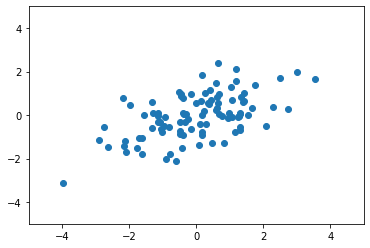

In [26]:
X = gen_data(n_sample)
plt_data(X)

## 学習

In [27]:
n_components=2 # component: 成分

# moment ここでは分散
def get_moments(X):
    # 列方向に平均を
    mean_ = X.mean(axis=0)
    print("X[0:5] : ")
    print(X[0:5])
    print("mean_")
    print(mean_)
    # 分母の -1 不偏分散
    Cov = ((X - mean_).T @ (X - mean_)) / (len(X) - 1)
    # stan_cov = np.dot((X - mean).T, X - mean) / (len(X) - 1)
    return mean_, Cov
    
def get_components(EigenVectors, n_components):
  # eigenVectors 固有ベクトル
    print("EigenVectors.shape : ")
    print(EigenVectors.shape)
    print(EigenVectors[:, ::-1].shape)
    print(EigenVectors)
    print(EigenVectors[:, ::-1])
    # :: は start:stop:step stepが-1の時、逆に
    # W = EigenVectors[:, :n_components]
    W = EigenVectors[:, ::-1][:, :n_components]
    return W.T

def plt_result(X, first_, second_):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    # 第１主成分
    plt.quiver(0, 0, first_[0], first_[1], width=0.01, scale=6, color='red')
    # 第２主成分
    plt.quiver(0, 0, second_[0], second_[1], width=0.01, scale=6, color='green')

X[0:5] : 
[[-1.31055156  0.61592156]
 [-0.39631144  0.80007613]
 [ 1.0682982  -0.10666649]
 [ 0.33594733  0.54636622]
 [ 1.14668781 -0.75730465]]
mean_
[ 0.01562024 -0.03184563]
eigenValues_
[0.56256938 2.30478156]
EigenVectors.shape : 
(2, 2)
(2, 2)
[[ 0.51803401 -0.85536002]
 [-0.85536002 -0.51803401]]
[[-0.85536002  0.51803401]
 [-0.51803401 -0.85536002]]
Components
[[-0.85536002 -0.51803401]
 [ 0.51803401 -0.85536002]]


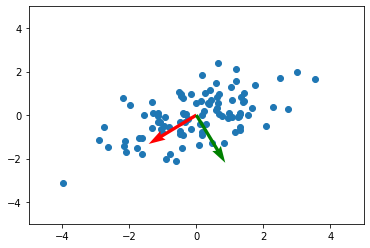

In [28]:
#分散共分散行列
mean_, Cov = get_moments(X)
#固有値と固有ベクトルを計算
eigenValues_, EigenVectors = np.linalg.eigh(Cov)
print("eigenValues_")
print(eigenValues_)

Components = get_components(EigenVectors, n_components)
print("Components")
print(Components)

row_larger_eigen = 0
row_fewer_eigen = 1
# より大きい固有値に対応する固有ベクトル（主成分）の方が寄与率が大きい。
if eigenValues_[0] < eigenValues_[1] :
  row_larger_eigen = 1
  row_fewer_eigen = 0

first_ = EigenVectors[row_larger_eigen, :]
second_ = EigenVectors[row_fewer_eigen, :]

plt_result(X, first_, second_)

## 変換（射影）

In [29]:
def transform_by_pca(X, Pca):
    mean_ = X.mean(axis=0)
    print("X-mean")
    print(X[0:5])
    print(mean_)
    print((X - mean_)[0:5])
    return ((X - mean_) @ Components)
    # return np.dot(X-mean, components)

X-mean
[[-1.31055156  0.61592156]
 [-0.39631144  0.80007613]
 [ 1.0682982  -0.10666649]
 [ 0.33594733  0.54636622]
 [ 1.14668781 -0.75730465]]
[ 0.01562024 -0.03184563]
[[-1.3261718   0.6477672 ]
 [-0.41193168  0.83192176]
 [ 1.05267796 -0.07482086]
 [ 0.32032709  0.57821186]
 [ 1.13106756 -0.72545901]]


(-5.0, 5.0)

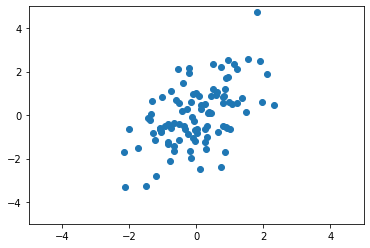

In [30]:
Z = transform_by_pca(X, Components.T)
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 逆変換

In [31]:
mean_ = X.mean(axis=0)
X_rev = Z @ Components.T + mean_
# X_ = np.dot(Z, components.T) + mean

(-5.0, 5.0)

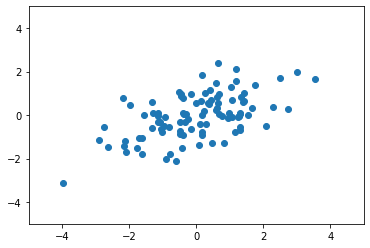

In [32]:
plt.scatter(X_rev[:, 0], X_rev[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## sklearn

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
print('Components: {}'.format(pca.components_))
print('mean_: {}'.format(pca.mean_))
print('Covariance: {}'.format(pca.get_covariance())) 

Components: [[-0.85536002 -0.51803401]
 [-0.51803401  0.85536002]]
mean_: [ 0.01562024 -0.03184563]
Covariance: [[1.83724283 0.77198394]
 [0.77198394 1.03010811]]


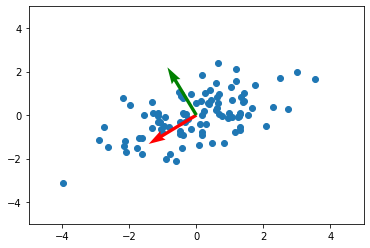

In [35]:
plt_result(X, pca.components_[0, :], pca.components_[1, :])